## Simple Classification Example

Let's start with loading all necessary packages: 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold

For this classification example, we are going to work with the Wisconson breast cancer dataset, containing information on 30 features from 569 patients. Each example is labeled as 'malignant' or 'benign'. 

In [16]:
cancer_data = load_breast_cancer() # import data

X, y = cancer_data.data, cancer_data.target

(455, 30)
(455,)
(114, 30)
(114,)
0.6263736263736264
0.631578947368421


***
Notes: 

If you want to see which features have good separation between the classes, check out seaborn.kdeplot().  
For each feature, plot the distributions of malignant and benign and see how much they overlap

After the features have been extracted, the only big difference to look out for with biomed data 
is splitting by patient if each patient has more than one example. That isn't the case in this dataset. 

Remember that we also need to standardize this data for certain classifiers to perform well. 
Read up on the difference between standardization and normalization and when you would use which.  
***

Now we need to split the data into a training set and test set, and standardize the features: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) # 80/20 split 

# standardization (subtract the mean and divide by the variance - or just use this function)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # we apply the same transformation to X_test that we did to X_train

In this next step, we split the training set for 5-fold cross validation to test different hyperparameter values: 

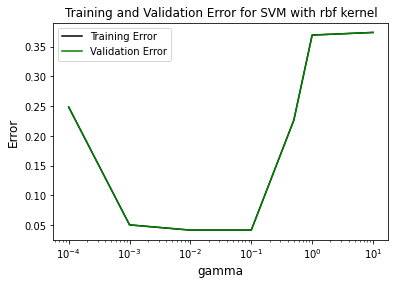

In [48]:
# set up 5 folds 
kf = KFold(n_splits=5)

# create list of hyperparameter values to test out. Starting with a decade search 
hparams = np.array([0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10])

# create placeholders for error measures
SVM_rbf_tn_error = np.zeros([len(hparams),1]) # training error for SVM with rbf kernel
SVM_rbf_vl_error = np.zeros([len(hparams),1]) # validation error

for train_index, test_index in kf.split(X_train):
    xtn, xtt = X_train[train_index], X_train[test_index] # create mini training and testing sets
    ytn, ytt = y_train[train_index], y_train[test_index]
    
    for j in range(0,len(hparams)): 
        SVM_rbf = svm.SVC( C=1, kernel='rbf', gamma=hparams[j]) # SVM with a radial basis function kernel
        SVM_rbf.fit(xtn, ytn) # now you have a machine learning model
        
        y_pred_train = SVM_rbf.predict(xtn)
        y_pred_test = SVM_rbf.predict(xtt)
        
        # compute simple accuracy metric 
        training_accuracy = np.sum(y_pred_train==ytn)/ytn.shape[0]
        validation_accuracy = np.sum(y_pred_test==ytt)/ytt.shape[0]
        
        # update the error placeholders 
        SVM_rbf_tn_error[j,0] = SVM_rbf_tn_error[j,0]+(1-training_accuracy)
        SVM_rbf_vl_error[j,0] = SVM_rbf_vl_error[j,0]+(1-validation_accuracy)
        
        
# once out of the loop, you need to take the average of the error over the 5 folds 
SVM_rbf_tn_error = SVM_rbf_vl_error/5
SVM_rbf_vl_error = SVM_rbf_vl_error/5

fig = plt.figure(); 
plt.plot(hparams,SVM_rbf_tn_error,c = 'black',label='Training Error') 
plt.plot(hparams,SVM_rbf_vl_error,c = 'green',label='Validation Error')
plt.xscale('log')
plt.title('Training and Validation Error for SVM with rbf kernel')
plt.xlabel('gamma',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend()
plt.show()
    

    

***
It looks like a gamma of 0.1 is giving us the best validation error, so that's what we'll use to train the final model.

In [49]:
SVM_rbf = svm.SVC( C=1, kernel='rbf', gamma=0.1) # SVM with a radial basis function kernel
SVM_rbf.fit(X_train, y_train) # now you have a machine learning model
        
y_pred_test = SVM_rbf.predict(X_test)


Let's see how accurate this model is: 

In [50]:
conf_matrix = confusion_matrix(y_test,y_pred_test)
accuracy = sklearn.metrics.accuracy_score(y_test,y_pred_test)
precision = sklearn.metrics.precision_score(y_test,y_pred_test)
recall = sklearn.metrics.recall_score(y_test,y_pred_test)

print('Confusion Matrix:')
print(conf_matrix)

print('Accuracy is: ' + str(accuracy*100) + '%')
print('Precision is: ' + str(precision*100) + '%')
print('Sensitivity is: ' + str(recall*100) + '%')


Confusion Matrix:
[[40  2]
 [ 1 71]]
Accuracy is: 97.36842105263158%
Precision is: 97.26027397260275%
Sensitivity is: 98.61111111111111%


***
Now just for fun, we'll check what would have happened had we used a 'dummy' classifier, simply assuming that no patients had cancer. In this dataset, a prediction of 1 is a prediction that the sample is benign. 

In [52]:
# check against the dummy classifier: assume all are non-cancer
# in this dataset, a prediction of 1 is a prediction that the sample is benign

y_pred_dummy = np.ones(y_test.shape)

conf_matrix = confusion_matrix(y_test,y_pred_dummy)
accuracy = sklearn.metrics.accuracy_score(y_test,y_pred_dummy)
precision = sklearn.metrics.precision_score(y_test,y_pred_dummy)
recall = sklearn.metrics.recall_score(y_test,y_pred_dummy)

print('Confusion Matrix:')
print(conf_matrix)

print('Accuracy is: ' + str(accuracy*100) + '%')
print('Precision is: ' + str(precision*100) + '%')
print('Sensitivity is: ' + str(recall*100) + '%')

Confusion Matrix:
[[ 0 42]
 [ 0 72]]
Accuracy is: 63.1578947368421%
Precision is: 63.1578947368421%
Sensitivity is: 100.0%


***
Although this was a pretty simple classification problem, I hope this helps you attack some more difficult problems in the future. 

Good luck! 